In [1]:
import cv2
import os
from PIL import Image
import numpy as np 
import pandas as pd

In [2]:
# Set the path to the dataset
dataset_path = "/kaggle/input/brain-tumor-detection"

# Define the training and testing directories
no_tumor_images = os.listdir(dataset_path + '/no/')
yes_tumor_images = os.listdir(dataset_path + '/yes/')

In [3]:
img = cv2.imread(dataset_path + "/yes/"+ "y652.jpg")
img.shape

(324, 278, 3)

/tmp/ipykernel_17/4284110795.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(dataset_path+ "/yes/"+ "y652.jpg")


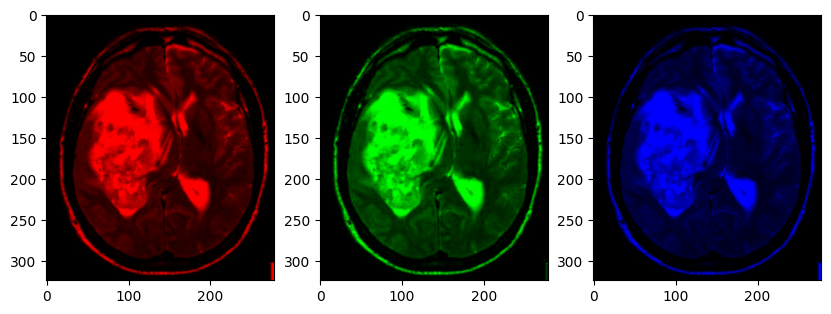

In [4]:
import imageio
import matplotlib.pyplot as plt
image = imageio.imread(dataset_path+ "/yes/"+ "y652.jpg")

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5))

red_image = image.copy()
red_image[:, :, 1] = 0
red_image[:, :, 2] = 0

green_image = image.copy()
green_image[:, :, 0] = 0
green_image[:, :, 2] = 0

blue_image = image.copy()
blue_image[:, :, 0] = 0
blue_image[:, :, 1] = 0

axes[0].imshow(red_image)
axes[1].imshow(green_image)
axes[2].imshow(blue_image)

In [5]:
no_img_label = []
no_img_width = []
no_img_height = []

for i, image_name in enumerate(no_tumor_images):
    if image_name.split(".")[1] == 'jpg':
        no_img_label.append(image_name.split(".")[0])

        img = cv2.imread(dataset_path+ "/no/"+ image_name)
        no_img_width.append(img.shape[0])
        no_img_height.append(img.shape[1])

In [6]:
no_info = {"image_label":no_img_label, "image_width":no_img_width, "image_height":no_img_height}
no_images_info_df = pd.DataFrame(no_info)
no_images_info_df

,image_label,image_width,image_height
0,no26,282,230
1,no979,234,215
2,no598,213,236
3,no141,221,228
4,no715,252,200
...,...,...,...
1495,no941,243,207
1496,no853,340,339
1497,no884,225,225
1498,no1370,225,225


In [7]:
no_images_info_df.describe()

,image_width,image_height
count,1500.000000,1500.000000
mean,306.702667,299.980667
std,141.918226,148.211275
min,168.000000,150.000000
25%,225.000000,214.000000
50%,238.000000,227.000000
75%,400.000000,368.000000
max,1080.000000,1920.000000


array([[<Axes: title={'center': 'image_width'}>,
        <Axes: title={'center': 'image_height'}>]], dtype=object)

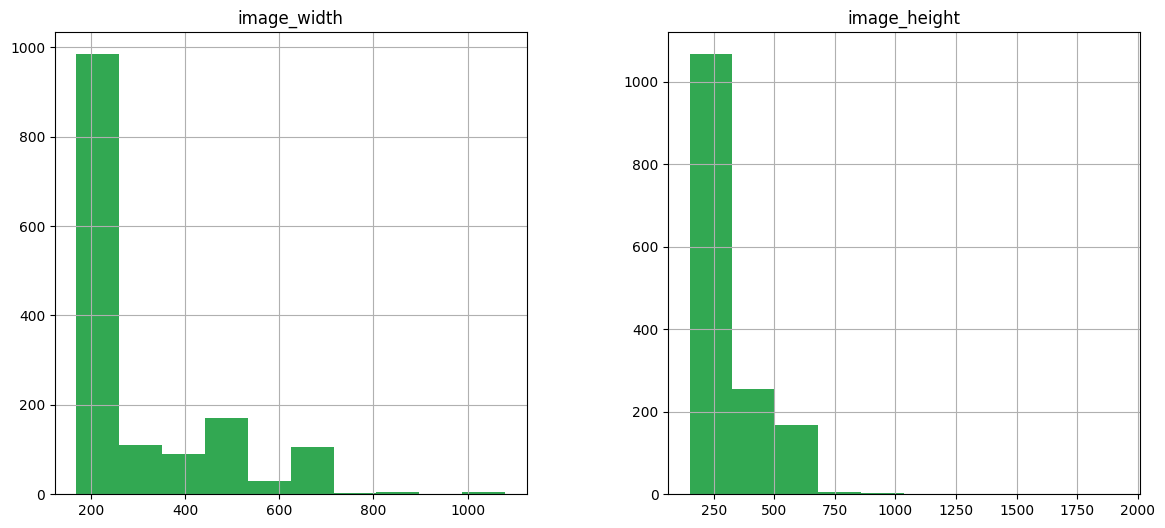

In [8]:
no_images_info_df[["image_width", "image_height"]].hist(figsize=(14,6), bins=10, color='#32a852') 

In [9]:
yes_img_label = []
yes_img_width = []
yes_img_height = []

for i, image_name in enumerate(yes_tumor_images):
    if image_name.split(".")[1] == 'jpg':
        yes_img_label.append(image_name.split(".")[0])

        img = cv2.imread(dataset_path+ "/yes/"+ image_name)
        yes_img_width.append(img.shape[0])
        yes_img_height.append(img.shape[1])
        
yes_info = {"image_label":yes_img_label, "image_width":yes_img_width, "image_height":yes_img_height}
yes_images_info_df = pd.DataFrame(yes_info)
yes_images_info_df

,image_label,image_width,image_height
0,y925,277,272
1,y424,336,264
2,y708,316,270
3,y115,620,620
4,y504,251,201
...,...,...,...
1495,y1379,349,425
1496,y1452,325,254
1497,y378,344,279
1498,y178,960,781


array([[<Axes: title={'center': 'image_width'}>,
        <Axes: title={'center': 'image_height'}>]], dtype=object)

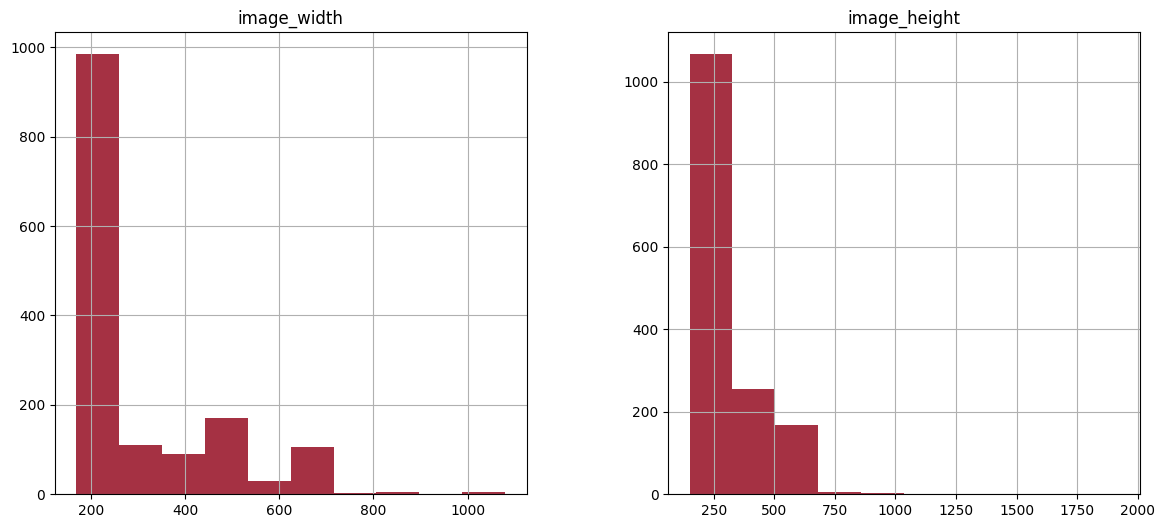

In [10]:
no_images_info_df[["image_width", "image_height"]].hist(figsize=(14,6), bins=10, color='#A53143')

In [11]:
yes_images_info_df.describe()

,image_width,image_height
count,1500.000000,1500.000000
mean,398.853333,350.455333
std,206.095229,193.916053
min,167.000000,175.000000
25%,294.000000,247.500000
50%,342.000000,283.000000
75%,380.000000,353.000000
max,1427.000000,1275.000000


In [12]:
import cv2 
import os
import tensorflow as tf 
from PIL import Image
import numpy as np 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import normalize 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Conv2D, MaxPooling2D,
     Activation, Dropout, Flatten, Dense)
from tensorflow.keras.utils import to_categorical

In [13]:
dataset_path = "/kaggle/input/brain-tumor-detection"
no_tumor_images = os.listdir(dataset_path + '/no/')
yes_tumor_images = os.listdir(dataset_path + '/yes/')

dataset=[]
label=[]

INPUT_SIZE=64

for i, image_name in enumerate(no_tumor_images):
    if image_name.split(".")[1] == 'jpg':
        image = cv2.imread(dataset_path+"/no/"+image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(0)

for i, image_name in enumerate(yes_tumor_images):
    if image_name.split(".")[1] == 'jpg':
        image = cv2.imread(dataset_path+"/yes/"+image_name)
        image = Image.fromarray(image, "RGB")
        image = image.resize((INPUT_SIZE, INPUT_SIZE))
        dataset.append(np.array(image))
        label.append(1)

In [14]:
# Plotting Accuracy and Loss of the model 
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

### Model 1: Categorical Cross Entropy

In [15]:
dataset= np.array(dataset) 
label= np.array(label)

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

# Categorical Cross Entropy 
y_train = to_categorical(y_train, num_classes=2)
y_test = to_categorical(y_test, num_classes=2)

In [16]:
# Model Building
model_1 = Sequential()

# first layer
model_1.add(Conv2D(filters= 32, kernel_size=(3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# 1st hidden layer
model_1.add(Conv2D(filters= 32, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# 2nd hidden layer
model_1.add(Conv2D(filters= 64, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_1.add(Activation("relu"))
model_1.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer 
model_1.add(Flatten())
model_1.add(Dense(64))
model_1.add(Activation("relu"))
model_1.add(Dropout(0.5))

#Categorical Cross Entropy = 2, softmax   
model_1.add(Dense(2))
model_1.add(Activation("softmax"))
model_1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 176,290 (688.63 KB)

 Trainable params: 176,290 (688.63 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model_1.fit(x_train, y_train, batch_size=32, verbose=True, epochs=10,
          validation_data=(x_test, y_test), shuffle=False)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - accuracy: 0.5596 - loss: 26.6656 - val_accuracy: 0.4417 - val_loss: 0.6888
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5240 - loss: 0.6875 - val_accuracy: 0.4917 - val_loss: 0.6618
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5428 - loss: 0.6834 - val_accuracy: 0.5200 - val_loss: 0.6445
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.5424 - loss: 0.6805 - val_accuracy: 0.4417 - val_loss: 0.6910
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.5214 - loss: 0.6923 - val_accuracy: 0.4750 - val_loss: 0.6698
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.5306 - loss: 0.6898 - val_accuracy: 0.4283 - val_loss: 0.6988
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.5173 - loss: 0.6926 - val_accuracy: 0.4283 - val_loss: 0.6987
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.5173 - loss: 0.6926 - val_accuracy: 0.428

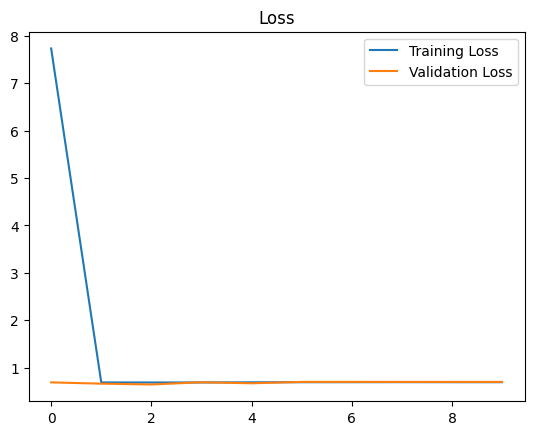

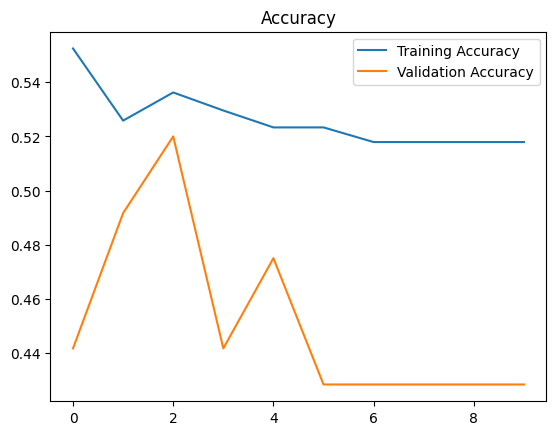

In [19]:
history_1 = model_1.history.history
plot_metrics(history_1)

In [20]:
# Binary Cross Entropy with Sigmoid Function. 
dataset= np.array(dataset) 
label= np.array(label)

x_train, x_test, y_train, y_test = train_test_split(dataset, label, test_size=0.2, random_state=0)

x_train = normalize(x_train, axis=1)
x_test = normalize(x_test, axis=1)

In [21]:
# Model Building
model_2 = Sequential()

# first layer
model_2.add(Conv2D(filters= 32, kernel_size=(3,3), input_shape=(INPUT_SIZE, INPUT_SIZE, 3)))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# 1st hidden layer
model_2.add(Conv2D(filters= 32, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# 2nd hidden layer
model_2.add(Conv2D(filters= 64, kernel_size=(3,3), kernel_initializer="he_uniform"))
model_2.add(Activation("relu"))
model_2.add(MaxPooling2D(pool_size=(2,2)))

# Flatten Layer 
model_2.add(Flatten())
model_2.add(Dense(64))
model_2.add(Activation("relu"))
model_2.add(Dropout(0.5))

# Binary Cross Entropy = 1, sigmoid 
model_2.add(Dense(1))
model_2.add(Activation("sigmoid"))
model_2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])


model_2.fit(x_train, y_train, batch_size=32, verbose=True, epochs=10,
          validation_data=(x_test, y_test), shuffle=False)

Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 82ms/step - accuracy: 0.6570 - loss: 0.6059 - val_accuracy: 0.7717 - val_loss: 0.4781
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 9s 71ms/step - accuracy: 0.8061 - loss: 0.4446 - val_accuracy: 0.8567 - val_loss: 0.3529
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.8649 - loss: 0.3328 - val_accuracy: 0.9000 - val_loss: 0.2897
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9019 - loss: 0.2514 - val_accuracy: 0.9200 - val_loss: 0.2233
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 11s 79ms/step - accuracy: 0.9309 - loss: 0.1918 - val_accuracy: 0.9367 - val_loss: 0.1900
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9583 - loss: 0.1297 - val_accuracy: 0.9400 - val_loss: 0.1719
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9707 - loss: 0.0963 - val_accuracy: 0.9567 - val_loss: 0.1167
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9838 - loss: 0.0611 - val_accuracy: 0.9617 -

In [22]:
model_2.summary() 

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 29, 29, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 528,677 (2.02 MB)

 Trainable params: 176,225 (688.38 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 352,452 (1.34 MB)

In [23]:
model_2.fit(x_train, y_train, batch_size=32, verbose=True, epochs=10,
          validation_data=(x_test, y_test), shuffle=False)


Epoch 1/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9894 - loss: 0.0344 - val_accuracy: 0.9700 - val_loss: 0.0872
Epoch 2/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 71ms/step - accuracy: 0.9931 - loss: 0.0236 - val_accuracy: 0.9733 - val_loss: 0.1010
Epoch 3/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9945 - loss: 0.0205 - val_accuracy: 0.9517 - val_loss: 0.1618
Epoch 4/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.9915 - loss: 0.0260 - val_accuracy: 0.9700 - val_loss: 0.1142
Epoch 5/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 10s 72ms/step - accuracy: 0.9980 - loss: 0.0100 - val_accuracy: 0.9650 - val_loss: 0.1262
Epoch 6/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9783 - val_loss: 0.0999
Epoch 7/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - accuracy: 0.9948 - loss: 0.0182 - val_accuracy: 0.9567 - val_loss: 0.1555
Epoch 8/10
75/75 ━━━━━━━━━━━━━━━━━━━━ 5s 71ms/step - accuracy: 0.9964 - loss: 0.0182 - val_accuracy: 0.9717 -

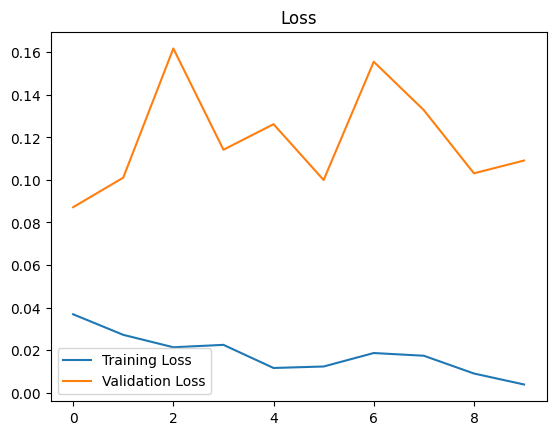

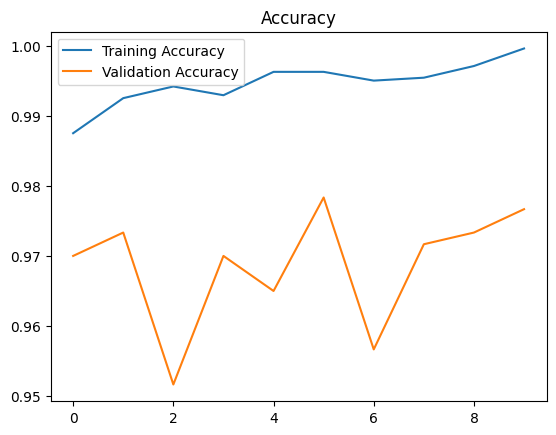

In [24]:
history_2 = model_2.history.history
plot_metrics(history_2)